In [173]:
import random
import math
from statistics import mean
import pandas as pd
import numpy
import matplotlib
import matplotlib.pyplot as plt

In [174]:
## The game is simple. Roll a 100 sided dice. If you roll 1-50, you lose. If you roll 51-99, you win. 
#If you roll $100 you lose

In [175]:
##This creates our dice roll, it determines win/loss
def rollDice():
    roll = random.randint(1,100)
    if roll == 100:
        #print(roll,'Loss')
        return False
    elif roll <=  50:
        #print(roll,'Loss')
        return False
    else:
        #print(roll, 'Win')
        return True
    #return roll

In [176]:
#dice tester
x = 100
while x < 100:
    result = rollDice()
    print(result)
    x+= 1

In [177]:
# Now we create our different betting strategies; our different bettors. 

In [178]:
def simpleBettor(funds, initialWager,wagerCount):
    value = funds
    wager = initialWager
    wX = []
    vY = []
    currentWager = 1
    while (currentWager <= wagerCount) and (value > 0):
        if rollDice():
            value += wager
        else:
            value -= wager
        wX.append(currentWager)
        vY.append(value)
        currentWager += 1
    plt.plot(wX,vY)
    return(value)

In [179]:
def doubleBettor(funds, initialWager,wagerCount):
    value = funds
    wager = initialWager
    wX = []
    vY = []
    currentWager = 1
    while (currentWager <= wagerCount) and (value > 0):
        #wager = random.randint(0,51)
        if rollDice():
            value += wager
            #print('Win')
        else:
            value -= wager
            if((wager*2)>value):
                wager = value
            else:
                wager = wager*2
            #print('Loss')
        wX.append(currentWager)
        vY.append(value)
        currentWager += 1
    #print('Funds:', value)
    plt.plot(wX,vY)
    #z = numpy.polyfit(wX, vY, 1)
    #p = numpy.poly1d(z)
    #plt.plot(wX,p(wX),"r-")
    return(value)

In [180]:
def bettingSim(playerCount,funds,initialWager,wagerCount,bettor):
    x = 0
    broke = 0
    profit = 0
    loss = 0
    fundsList = []
    while x < playerCount:
        fundsList.append(bettor(funds,initialWager,wagerCount))
        if fundsList[x] > funds:
            profit += 1
        elif fundsList[x] < funds:
            loss += 1
        if fundsList[x] <= 0:
            broke += 1
        x+=1
    #print(mean(fundsList))
    df = pd.DataFrame(fundsList)
    #df.describe()
    plt.ylabel('Account Value')
    plt.xlabel('Wager Count')
    #plt.show()
    plt.savefig('diceSim.png',dpi=800)
    print(df.describe())
    print('Percent of players who made money:',(profit/playerCount)*100,'%')
    print('Percent of players who lost money:',(loss/playerCount)*100,'%')
    print('Percent of players who went broke:',(broke/playerCount)*100,'%')
    

In [165]:
##Here you actually simulate the betting
#Syntax: bettingSim(playerCount,funds,intialWager,wagerCount,bettor)
##Here are the parameters:
# playerCount: number of players to run the simulation with. 
# funds: number of starting funds for each players
# initialWager: initial wager for each player
# wagerCount: essentially the game length, how many wagers/bets each player can make at a maximum if they don't go broke
# bettor: this is where you choose which betting strategy to simulate.
    # simpleBettor, this bettor bets his initial wager every time
    # doulbeBettor, this bettor bets double his past wager if he loses.
        #if he doesn't have enough money to double his past wager he goes all in

In [ ]:
bettingSim(playerCount,funds,intialWager,wagerCount,bettor)

             0
count  10000.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Percent of players who made money: 0.0 %
Percent of players who lost money: 100.0 %
Percent of players who went broke: 100.0 %


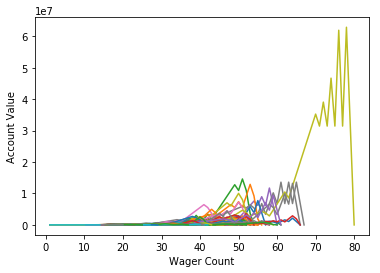

In [167]:
bettingSim(10000,10000,100,1000,doubleBettor)

                  0
count   1000.000000
mean     733.600000
std     2820.245526
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max    27800.000000
Percent of players who made money: 2.5 %
Percent of players who lost money: 97.3 %
Percent of players who went broke: 91.2 %


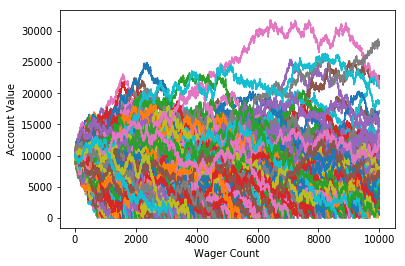

In [168]:
bettingSim(1000,10000,100,10000,simpleBettor)

In [ ]:
playerCount = input("How many players should this simulation have? (int)")
funds = input("How much funds should each player start with? (int)")
initialWager = input("What should each player's initial wager be? (int)")
wagerCount = input("What should the game length be? (int)")
bettor = input("Which betting strategy should the players use? (simpleBettor, doubleBettor)")
playerCount = int(playerCount)
funds = int(funds)
initialWager = int(initialWager)
wagerCount = int(wagerCount)
if bettor == 'simpleBettor':
    bettor = simpleBettor
elif bettor == 'doubleBettor':
    bettor = doubleBettor
bettingSim(playerCount,funds,initialWager,wagerCount,bettor)

            0
count  1000.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Percent of players who made money: 0.0 %
Percent of players who lost money: 100.0 %
Percent of players who went broke: 100.0 %


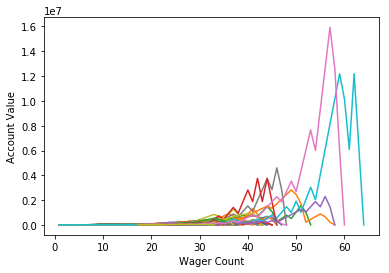

In [172]:
bettingSim(1000,10000,100,1000,doubleBettor)